## Data Retrieval, Machine Learning, and Visualization using Python Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import json
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from time import sleep
from random import randint
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Web Scraping IMDb Movie Data with Selenium and Storing in a DataFrame
This title reflects the use of Selenium to scrape movie data from IMDb, such as movie names, links, release years, scores, meta scores, votes/gross, and spam data. The code then stores this information in a pandas DataFrame for further analysis.

In [2]:
website = "https://www.imdb.com/search/title/?at=0&num_votes=5000,&sort=user_rating,desc&start=1&title_type=feature"
driver = webdriver.Chrome()
driver.get(website)
None_str='None'

#make the list empty

movie_name=list()               
link_to_movie_page=list()       
movie_year=list()                             
movie_score=list()              
meta_movie_score=list()
movie_votes_gross=list()
movie_spam=list()  

#make the df empty

df= pd.DataFrame({'movie_name':movie_name,
                  'link_to_movie_page':link_to_movie_page,
                  'movie_year':movie_year,
                  'movie_score':movie_score,
                  'meta_movie_score':meta_movie_score,
                  'movie_votes_gross':movie_votes_gross,
                  'movie_spam':movie_spam})

#crowling with selenium and appent into the datalist
for x in range(200):
    link_xpath='//*[@id="main"]/div/div[3]/div/div'
    matches = driver.find_elements('xpath',link_xpath)
    for match in matches:
        
            try:
                name_element      =  match.find_element('xpath', "./div[3]/h3/a")
                name = name_element.text
            except:
                name = None
                
                
            try: 
                link_element = match.find_element('xpath',"./div[3]/h3/a")
                link_to_page = link_element.get_attribute("href")
            except:
                link_to_page = None
                
                
            try:    
                year_element      =  match.find_element('xpath', "./div[3]/h3/span[2]")
                year = year_element.text
            except:
                year = None
                
                
            try:    
                score_element     =  match.find_element('xpath', "./div[3]/div/div[1]/strong")
                score = score_element.text
            except:
                score = None
                
                
            try:    
                meta_score_element=  match.find_element('xpath', "./div[3]/div/div[3]/span")
                meta_score = meta_score_element.text
            except:
                meta_score = None
                
                
            try:    
                votes_gross       =  match.find_elements('xpath', "./div[3]/p[4]//span")
                votes_gross_list = [element.text for element in votes_gross]
            except:
                votes_gross_list = None
                
                
            try:    
                spam          =  match.find_elements('xpath', "./div[3]/p[1]//span")
                spam_list = [element.text for element in spam]
            except:
                spam_list = None
                
            
    
            movie_name.append(name)
            link_to_movie_page.append(link_to_page)
            movie_year.append(year)
            movie_score.append(score)
            meta_movie_score.append(meta_score)
            movie_votes_gross.append(votes_gross_list)
            movie_spam.append(spam_list)
            
    try:
        element = WebDriverWait(driver, 30).until(
        EC.presence_of_element_located((By.LINK_TEXT, "Next »"))
        )
        element.click()
    except:
        driver.quit()
df= pd.DataFrame({'movie_name':movie_name,
                  'link_to_movie_page':link_to_movie_page,
                  'movie_year':movie_year,
                  'movie_score':movie_score,
                  'meta_movie_score':meta_movie_score,
                  'movie_votes_gross':movie_votes_gross,
                  'movie_spam':movie_spam})
df

Error getting version of chromedriver 115. Retrying with chromedriver 114 (attempt 1/5)


MaxRetryError: HTTPConnectionPool(host='localhost', port=50934): Max retries exceeded with url: /session/c2307ca47c881cebb489097d19f96c96/elements (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001CBF4F6D280>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [ ]:
#df.to_csv(r'C:\Users\msvis\Desktop\project\movie_project_dataframe1.csv', index=False, header=True)

In [ ]:
#all data before cleaning
file_path = r"C:\Users\msvis\Desktop\project\movie_project_dataframe1.csv"
df = pd.read_csv(file_path)

## Data Processing Code for Movie Information: Extracting, Cleaning, and Transforming Movie Data

In [228]:
movie_votes= list()
movie_gross= list()

df['movie_year'] = df['movie_year'].str.replace('(', '')
df['movie_year'] = df['movie_year'].str.replace(')', '')

split_df = df['movie_votes_gross'].str.split('|', expand=True)
if (len(split_df.columns) == 2):
    split_df.columns = ['movie_votes', 'movie_gross']  
else:
    ['movie_votes']
df = pd.concat([df, split_df], axis=1)

df.drop(columns=['movie_votes_gross'], inplace=True)

words_to_remove = ["[","]","'",":","Votes","Gross",","]
for word in words_to_remove:
    df['movie_votes'] = df['movie_votes'].str.replace(word, '')
    df['movie_gross'] = df['movie_gross'].str.replace(word, '')
    
movie_length= list()
movie_genre= list()
movie_age= list()

split_df = df['movie_spam'].str.split('|', expand=True)
if len(split_df.columns) == 3:
    split_df.columns = ['movie_age', 'movie_length', 'movie_genre']
else:
    split_df.columns = ['movie_length', 'movie_genre']
df = pd.concat([df, split_df], axis=1)

for x in range(len(df)):
    if(df.loc[x,"movie_genre"]==None):
        df.loc[x,"movie_genre"] = df.loc[x,"movie_length"]
        df.loc[x,"movie_length"] = df.loc[x,"movie_age"]
        df.loc[x,"movie_age"] = None
        
words_to_remove = ["[","]","'",":"," "]
for word in words_to_remove:
    df['movie_age'] = df['movie_age'].str.replace(word, '')
    df['movie_length'] = df['movie_length'].str.replace(word, '')
    df['movie_genre'] = df['movie_genre'].str.replace(word, '')
    
words_to_remove = [",","min"]
for word in words_to_remove:
    df['movie_age'] = df['movie_age'].str.replace(word, '')
    df['movie_length'] = df['movie_length'].str.replace(word, '')
words_to_remove = ["M","$"," "]
for word in words_to_remove:
    df['movie_gross'] = df['movie_gross'].str.replace(word, '')
    
df.rename(columns={"movie_length": "movie_length_min"}, inplace=True)
df.rename(columns={"movie_gross": "movie_gross_in_M_dolars"}, inplace=True)

df = df.drop("movie_spam", axis=1)

df["movie_year"] = pd.to_numeric(df["movie_year"], errors='coerce')
df["movie_votes"] = pd.to_numeric(df["movie_votes"], errors='coerce')
df["movie_gross_in_M_dolars"] = pd.to_numeric(df["movie_gross_in_M_dolars"], errors='coerce')
df["movie_length_min"] = pd.to_numeric(df["movie_length_min"], errors='coerce')

df.dropna(inplace=True)

print(df.dtypes)

C:\Users\shain\AppData\Local\Temp\ipykernel_8592\3861090501.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['movie_year'] = df['movie_year'].str.replace('(', '')
C:\Users\shain\AppData\Local\Temp\ipykernel_8592\3861090501.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['movie_year'] = df['movie_year'].str.replace(')', '')
C:\Users\shain\AppData\Local\Temp\ipykernel_8592\3861090501.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['movie_votes'] = df['movie_votes'].str.replace(word, '')
C:\Users\shain\

movie_name                  object
link_to_movie_page          object
movie_year                 float64
movie_score                float64
meta_movie_score           float64
movie_votes                  int64
movie_gross_in_M_dolars    float64
movie_age                   object
movie_length_min             int64
movie_genre                 object
dtype: object


C:\Users\shain\AppData\Local\Temp\ipykernel_8592\3861090501.py:40: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['movie_age'] = df['movie_age'].str.replace(word, '')
C:\Users\shain\AppData\Local\Temp\ipykernel_8592\3861090501.py:41: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['movie_length'] = df['movie_length'].str.replace(word, '')
C:\Users\shain\AppData\Local\Temp\ipykernel_8592\3861090501.py:42: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['movie_genre'] = df['movie_genre'].str.replace(word, '')
C:\Users\

In [231]:
#df.to_csv(r'C:\Users\msvis\Desktop\project\movie_project_dataframe_clean1.csv', index=False, header=True)

In [2]:
#all data after cleaning
file_path = r'C:\Users\msvis\Desktop\project\movie_project_dataframe_clean1.csv'
df = pd.read_csv(file_path)
df

,movie_name,link_to_movie_page,movie_year,movie_score,meta_movie_score,movie_votes,movie_gross_in_M_dolars,movie_age,movie_length_min,movie_genre
0,Homot Shel Tikva,https://www.imdb.com/title/tt0111161/?ref_=adv...,1994.0,9.3,82.0,2771187,28.34,PG,142,",Drama"
1,Hasandak,https://www.imdb.com/title/tt0068646/?ref_=adv...,1972.0,9.2,100.0,1929130,134.97,PG,175,",Crime,Drama"
2,The Dark Knight,https://www.imdb.com/title/tt0468569/?ref_=adv...,2008.0,9.0,84.0,2746095,534.86,ALL,152,",Action,Crime,Drama"
3,Reshimut Schindler,https://www.imdb.com/title/tt0108052/?ref_=adv...,1993.0,9.0,95.0,1395365,96.90,PG,195,",Biography,Drama,History"
4,12 Angry Men,https://www.imdb.com/title/tt0050083/?ref_=adv...,1957.0,9.0,97.0,822000,4.36,ALL,96,",Crime,Drama"
...,...,...,...,...,...,...,...,...,...,...
3685,Austin Powers in Goldmember,https://www.imdb.com/title/tt0295178/?ref_=adv...,2002.0,6.2,62.0,217163,213.31,PG-13,94,",Action,Adventure,Comedy"
3686,Yarriv Intimy,https://www.imdb.com/title/tt0118972/?ref_=adv...,1997.0,6.2,53.0,69047,42.87,R,111,",Action,Crime,Drama"
3687,Outlander,https://www.imdb.com/title/tt0462465/?ref_=adv...,2008.0,6.2,40.0,77274,0.16,R,115,",Action,Adventure,Sci-Fi"
3688,47 Ronin,https://www.imdb.com/title/tt1335975/?ref_=adv...,2013.0,6.2,28.0,166452,38.36,PG-13,128,",Action,Drama,Fantasy"


In [209]:
df_copy = df.copy()
df_copy

,movie_name,link_to_movie_page,movie_year,movie_score,meta_movie_score,movie_votes,movie_gross_in_M_dolars,movie_age,movie_length_min,movie_genre
1,Homot Shel Tikva,https://www.imdb.com/title/tt0111161/?ref_=adv...,1994.0,9.3,82.0,2771187,28.34,PG,142,",Drama"
2,Hasandak,https://www.imdb.com/title/tt0068646/?ref_=adv...,1972.0,9.2,100.0,1929130,134.97,PG,175,",Crime,Drama"
6,The Dark Knight,https://www.imdb.com/title/tt0468569/?ref_=adv...,2008.0,9.0,84.0,2746095,534.86,ALL,152,",Action,Crime,Drama"
7,Reshimut Schindler,https://www.imdb.com/title/tt0108052/?ref_=adv...,1993.0,9.0,95.0,1395365,96.90,PG,195,",Biography,Drama,History"
8,12 Angry Men,https://www.imdb.com/title/tt0050083/?ref_=adv...,1957.0,9.0,97.0,822000,4.36,ALL,96,",Crime,Drama"
...,...,...,...,...,...,...,...,...,...,...
9990,Austin Powers in Goldmember,https://www.imdb.com/title/tt0295178/?ref_=adv...,2002.0,6.2,62.0,217163,213.31,PG-13,94,",Action,Adventure,Comedy"
9991,Yarriv Intimy,https://www.imdb.com/title/tt0118972/?ref_=adv...,1997.0,6.2,53.0,69047,42.87,R,111,",Action,Crime,Drama"
9992,Outlander,https://www.imdb.com/title/tt0462465/?ref_=adv...,2008.0,6.2,40.0,77274,0.16,R,115,",Action,Adventure,Sci-Fi"
9993,47 Ronin,https://www.imdb.com/title/tt1335975/?ref_=adv...,2013.0,6.2,28.0,166452,38.36,PG-13,128,",Action,Drama,Fantasy"


## Exploratory data analysis visualization
EDA helped me understand the data's characteristics and provided a foundation for further exploration and interpretation in the research.

In [233]:
df_copy['movie_year'] = pd.to_datetime(df_copy['movie_year'], format='%Y')

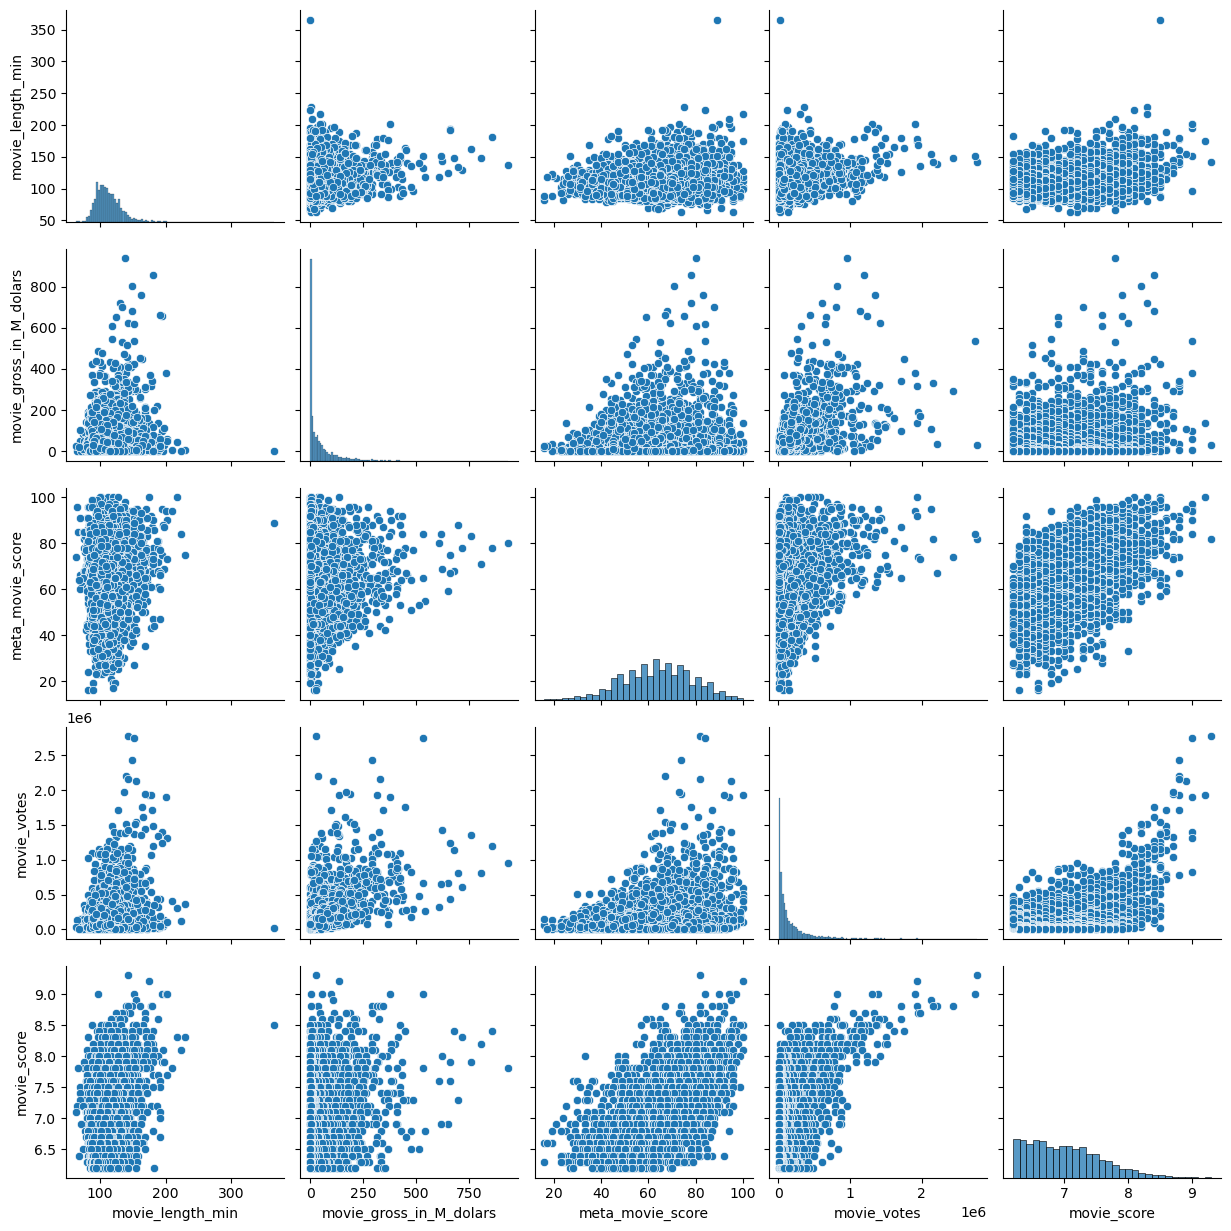

In [234]:
sns.pairplot(df_copy[['movie_length_min', 'movie_gross_in_M_dolars', 'meta_movie_score', 'movie_votes', 'movie_score', 'movie_year']])
plt.show()

C:\Users\shain\AppData\Local\Temp\ipykernel_8592\3680015228.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_copy.corr()


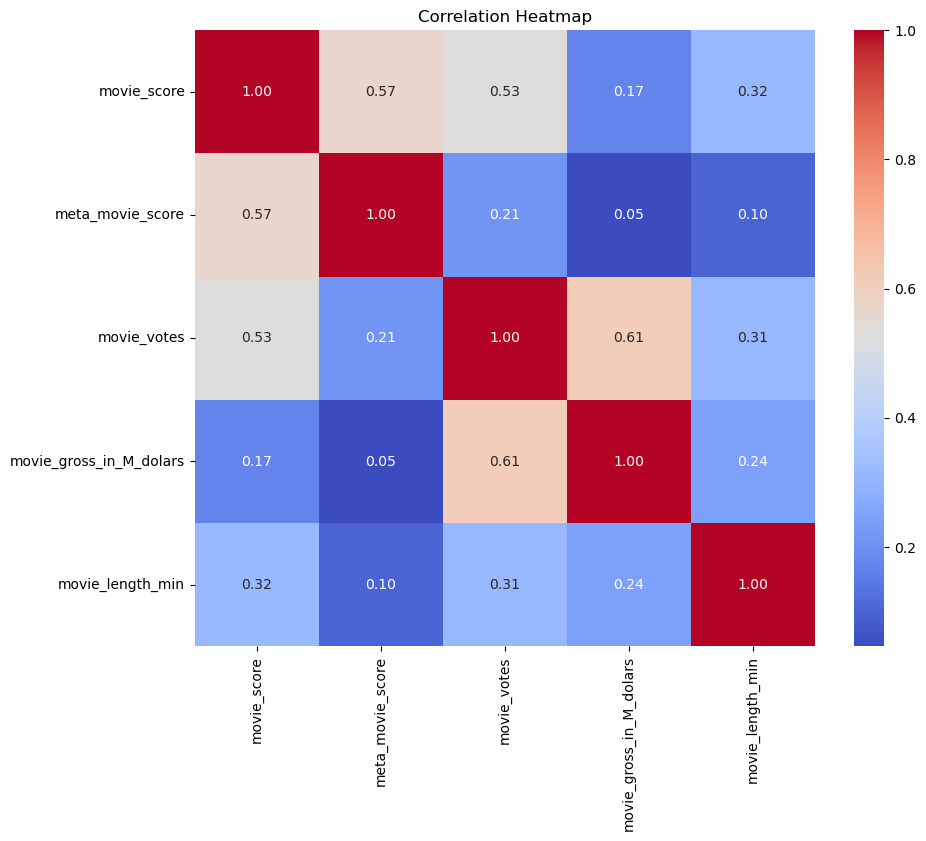

In [235]:
# Correlation heatmap to visualize the relationships between numeric columns
corr_matrix = df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

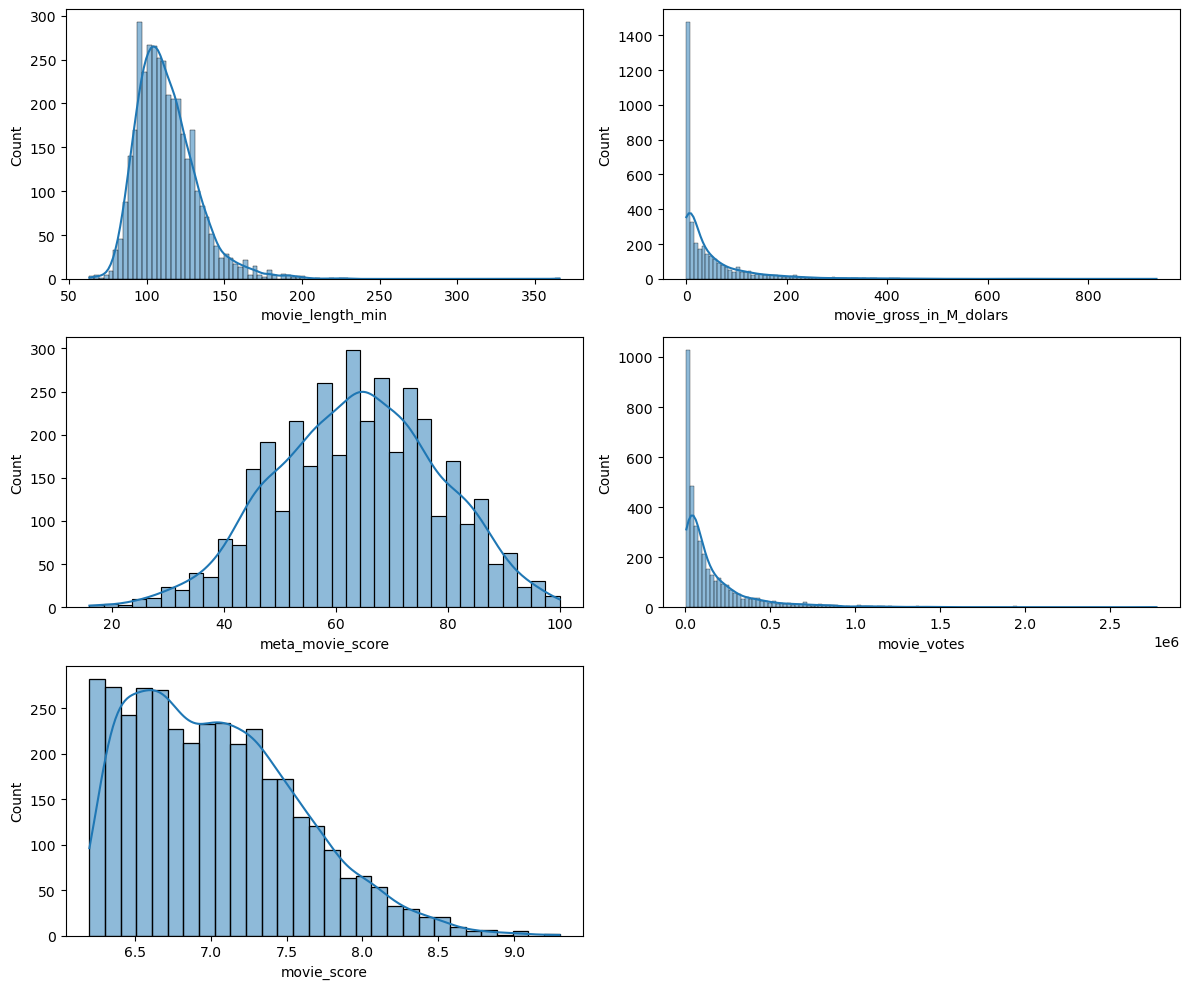

In [236]:
# Distribution plots for numeric columns
numeric_cols = ['movie_length_min', 'movie_gross_in_M_dolars', 'meta_movie_score', 'movie_votes', 'movie_score']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_copy[col], kde=True)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

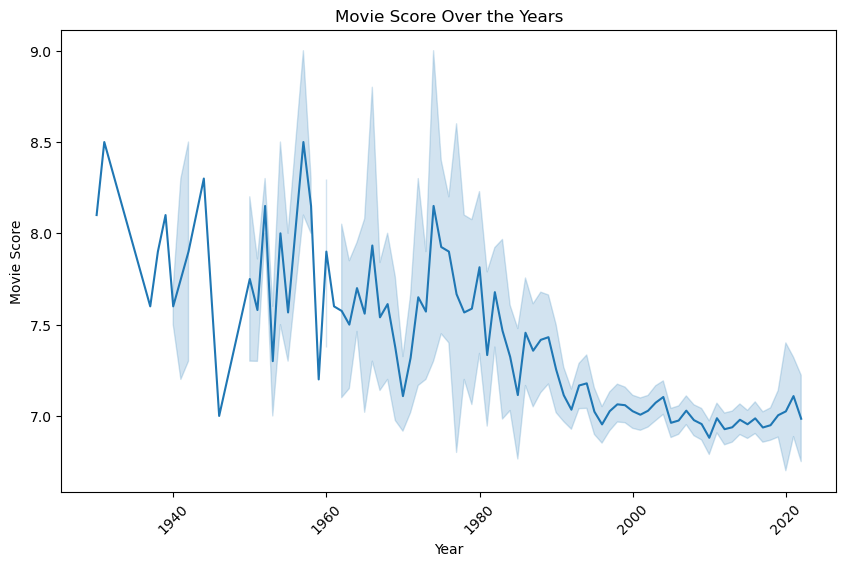

In [237]:
# Line plot to visualize movie_score over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='movie_year', y='movie_score', data=df_copy)
plt.title('Movie Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Movie Score')
plt.xticks(rotation=45)
plt.show()

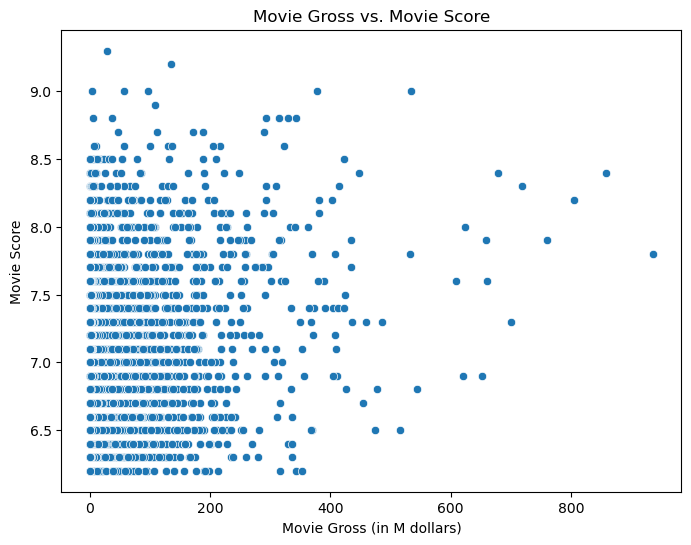

In [238]:
# Scatter plot to visualize the relationship between movie_gross_in_M_dolars and movie_score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='movie_gross_in_M_dolars', y='movie_score', data=df_copy)
plt.title('Movie Gross vs. Movie Score')
plt.xlabel('Movie Gross (in M dollars)')
plt.ylabel('Movie Score')
plt.show()

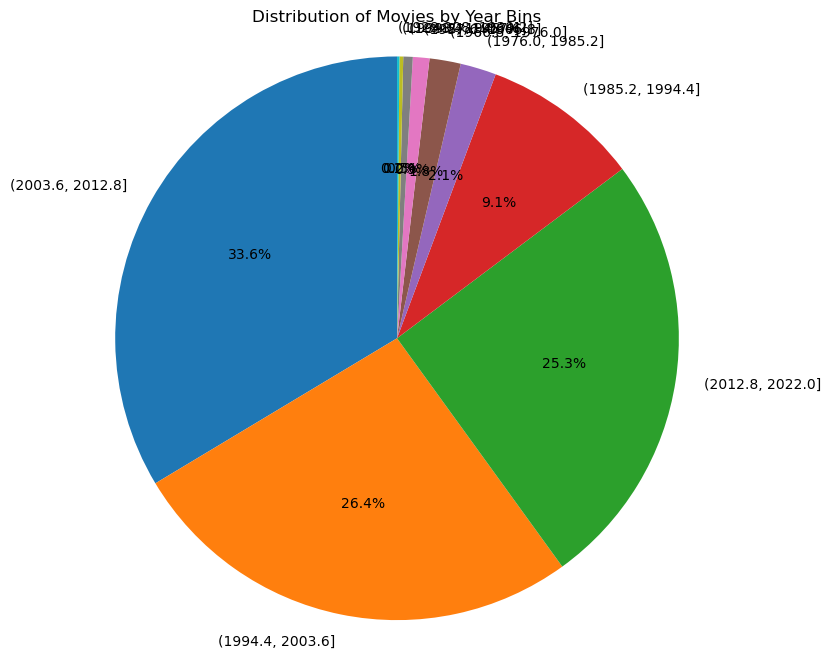

In [239]:
num_bins = 10
df_copy['year_bins'] = pd.cut(df_copy['movie_year'].dt.year, bins=num_bins)
year_counts = df_copy['year_bins'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movies by Year Bins')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()

## Machine learning for Movie Score Prediction

This code performs Machine learning to predict movie scores based on features like movie length, meta movie score, movie votes, movie year, and movie gross in millions of dollars. It splits the data into training and testing sets, initializes a few models, trains the models on the training data, and makes predictions on the test data. The code then creates a comparison DataFrame, showing the actual movie scores and the corresponding predicted scores, along with the differences between them. Finally, it displays the comparison DataFrame.

In [5]:
X = df[['movie_length_min', 'meta_movie_score', 'movie_votes','movie_year','movie_gross_in_M_dolars']]
y = df['movie_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

comparison_df = pd.DataFrame({'actual_movie_score': y_test, 'predict_movie_score': y_pred})

# Calculate the differences between predicted and actual movie_score
comparison_df['score_difference'] = comparison_df['actual_movie_score'] - comparison_df['predict_movie_score']

# Display the comparison DataFrame
print(comparison_df)

      actual_movie_score  predict_movie_score  score_difference
3557                 6.3             6.669035         -0.369035
3601                 6.3             6.650965         -0.350965
490                  7.7             7.111136          0.588864
921                  7.4             7.112797          0.287203
2972                 6.5             6.993812         -0.493812
...                  ...                  ...               ...
809                  7.5             7.142171          0.357829
3553                 6.3             6.613555         -0.313555
2575                 6.7             6.689535          0.010465
3612                 6.3             6.942851         -0.642851
1157                 7.3             7.303234         -0.003234

[738 rows x 3 columns]


In [6]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.13141932585517016
R-squared: 0.5861448355890951


In [241]:
# Assuming you already have a Jupyter DataFrame named 'df'

# Split the data into features (X) and the target variable (y)
X = df[['movie_length_min', 'meta_movie_score', 'movie_votes', 'movie_gross_in_M_dolars', 'movie_year']]
y = df['movie_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regression model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (Random Forest):", mse_rf)
print("R-squared (Random Forest):", r2_rf)

Mean Squared Error (Random Forest): 0.12474876693766948
R-squared (Random Forest): 0.6071512228883058


In [249]:
# Split the data into features (X) and the target variable (y)
X = df[['movie_length_min', 'meta_movie_score', 'movie_votes', 'movie_gross_in_M_dolars', 'movie_year']]
y = df['movie_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVR model
model_svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model using the training data
model_svr.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_svr = model_svr.predict(X_test_scaled)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Mean Squared Error (SVR):", mse_svr)
print("R-squared (SVR):", r2_svr)


Mean Squared Error (SVR): 0.11901913377185104
R-squared (SVR): 0.6251945225356283


In [250]:
# Split the data into features (X) and the target variable (y)
X = df[['movie_length_min', 'meta_movie_score', 'movie_votes', 'movie_gross_in_M_dolars', 'movie_year']]
y = df['movie_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regression model
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
model_gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = model_gb.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Mean Squared Error (Gradient Boosting):", mse_gb)
print("R-squared (Gradient Boosting):", r2_gb)

Mean Squared Error (Gradient Boosting): 0.11619544097441954
R-squared (Gradient Boosting): 0.6340866686436882
